# Project:

# Weather Classification Dataset:

> The Weather Classification aims to classify weather conditions using a combination of unsupervised and supervised learning techniques. By analyzing features like temperature, humidity, wind speed, and atmospheric pressure, the study clusters weather types and builds predictive models for classification. The outcome is a robust system capable of accurately predicting weather conditions, such as "Sunny," "Rainy," "Cloudy," or "Snowy," based on the given input features, aiding in better decision-making and planning across various applications

# Business Objective:

> The business objective of this project is to create a robust and efficient weather classification system that provides accurate and timely predictions of weather conditions. This system will serve as a valuable tool for various stakeholders, including meteorologists, farmers, and logistics companies, enabling them to make informed, data-driven decisions. By leveraging advanced machine learning techniques, the system will classify weather patterns and forecast conditions, helping stakeholders optimize their operations. For instance, meteorologists will enhance weather forecasting, farmers can better plan agricultural activities, and logistics companies can optimize delivery routes and schedules, all contributing to more effective resource allocation and risk mitigation.

# Aim of the Project:

> The project aims to achieve two objectives: first, to classify weather patterns using clustering techniques to segment data into meaningful groups, and second, to predict weather conditions using supervised machine learning models. By incorporating hyperparameter tuning and cross-validation, the project ensures accurate and practical results that can be applied in real-world scenarios and enhance understanding of climatic trends for better forecasting and strategic planning.

# Problem Statement:

> Weather conditions are influenced by multiple variables, making classification challenging. The goal is to process and analyze weather data to predict weather types accurately, addressing challenges like high variability and interdependence of features. Despite the availability of extensive meteorological data, its complexity often limits actionable insights. This project addresses these challenges by using clustering and predictive modeling to classify and forecast weather patterns, enabling businesses to minimize uncertainties and improve planning.

# Assumptions:

> 1) The dataset is representative of the region and time period under study.
> 2) Features like temperature, humidity, and pressure significantly influence weather classification.
> 3) No significant bias exists in the data collection process.
> 4) Outliers are assumed to represent valid extreme weather conditions rather than errors.

# Method of Analysis:

> 1) Data Understanding and Cleaning
> 2) Exploratory Data Analysis (EDA)
> 3) Feature Engineering
> 4) Unsupervised Learning
> 5) Supervised Learning
> 6) Model Optimization
> 7) Insights and Recommendations
> 8)  Interpreting results in a business context and Providing actionable insights

# 1) Data Understanding

In [1]:
# Importing required libraries for the project

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Importing the dataset

df = pd.read_csv("weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
# Displaying the first 5 items in the dataset

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
# Displaying the last 5 items in the dataset

df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [5]:
# Displaying the shape of the dataset in rows and columns

df.shape

(13200, 11)

In [6]:
# Displaying the column names, non-null count and dtype of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
# Displaying the count, mean, std, min, max, 25%, 50%, 75% of the dataset

df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


# 2) Data Cleaning

## Fixing rows & columns, inconsistencies & Filtering Data - dropping null values

In [8]:
# unique values of each columns in the dataframe(to determine the repetitive or same values)

df.apply(lambda x:x.unique())

Temperature             [14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0...
Humidity                [73, 96, 64, 83, 74, 55, 97, 85, 45, 43, 59, 8...
Wind Speed              [9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 2.0,...
Precipitation (%)       [82.0, 71.0, 16.0, 66.0, 26.0, 86.0, 96.0, 107...
Cloud Cover                      [partly cloudy, clear, overcast, cloudy]
Atmospheric Pressure    [1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1...
UV Index                [2, 7, 5, 1, 0, 8, 11, 3, 9, 4, 13, 10, 14, 6,...
Season                                   [Winter, Spring, Summer, Autumn]
Visibility (km)         [3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 7.5, 1.5,...
Location                                      [inland, mountain, coastal]
Weather Type                                [Rainy, Cloudy, Sunny, Snowy]
dtype: object

In [9]:
# Displaying the null values in the entire dataset

df.isnull().sum().sum()

0

# The dataset has no missing values and there is no inconsistencies in data found. Since all the columns are important for the analysis no columns were dropped.

# Checking for Outliers

In [10]:
# Selecting the int and float columns

numeric_columns=df.select_dtypes(include=["int","float"])
numeric_columns

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0
13198,3.0,76,10.0,94.0,984.27,0,2.0


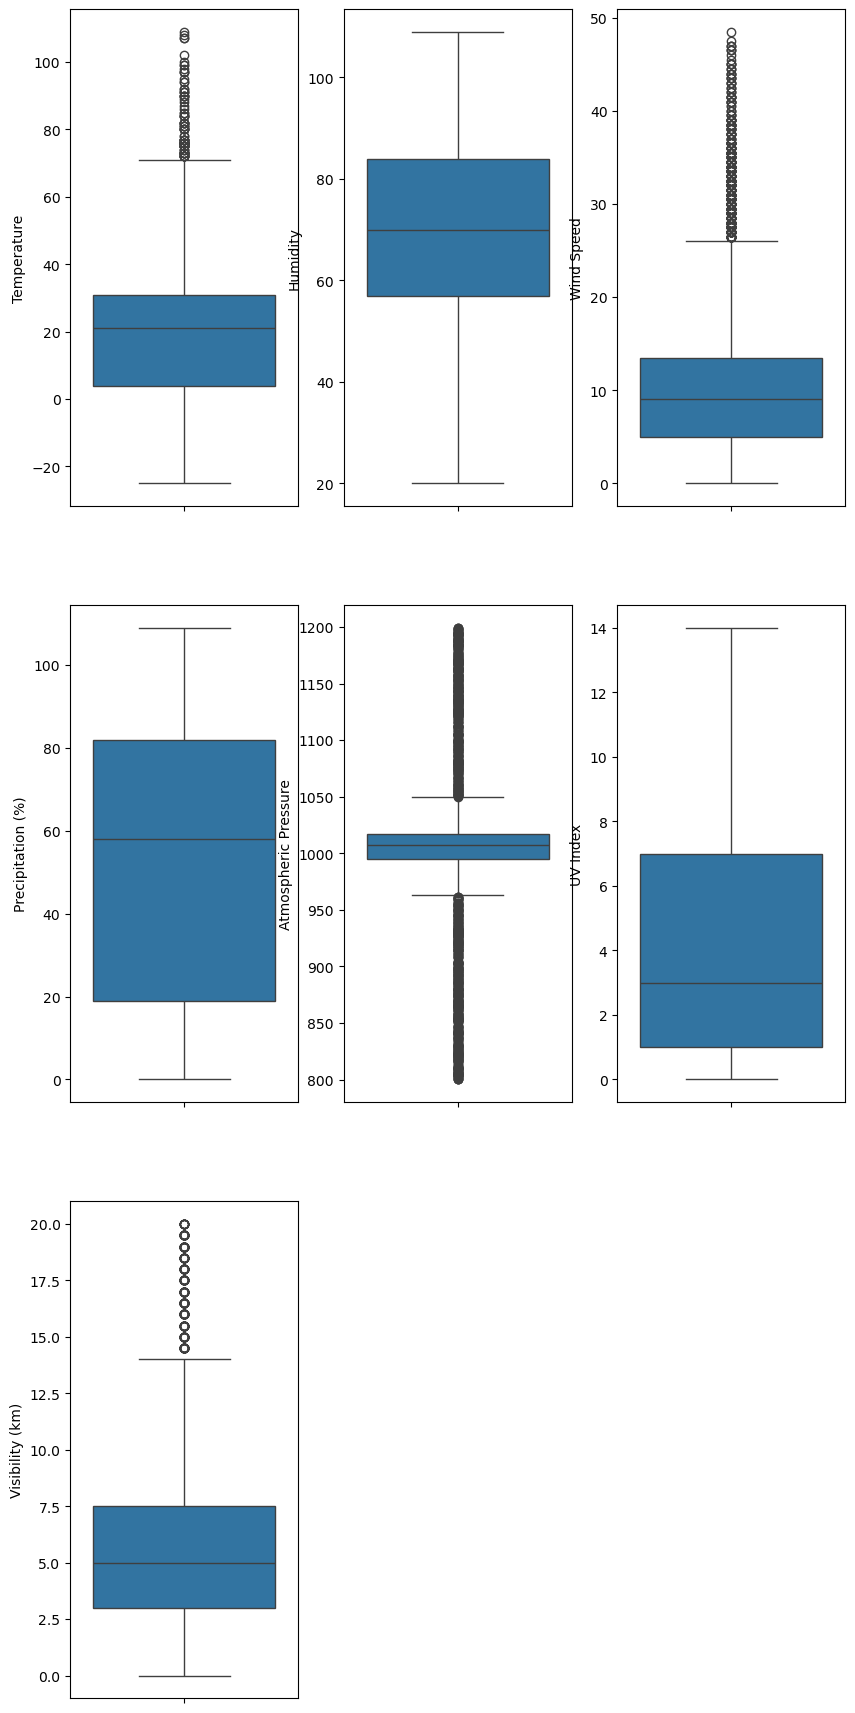

In [11]:
# Boxplots are plotted for numeric columns to check for outliers

plt.figure(figsize=(10,200))
for i in range(len(numeric_columns.columns)):
    plt.subplot(26,3,i+1)
    sns.boxplot(y=numeric_columns.columns[i],data=df)
plt.show()

## Since the Temperature, Wind Speed, Atmospheric Pressure and Visibility (km) varies across different regions dropping the outliers may decline the accuracy of the model. Hence the outliers were not dropped.

# 3) Data Analysis

### Continuous variables of the dataframe : 

- Temperature
- Humidity
- Wind Speed
- Precipitation (%)
- Atmospheric Pressure
- UV Index
- Visibility (km)


### Categorical variables of the dataframe :
- Cloud Cover
- Season
- Location
- Weather Type

# Univariate Analysis

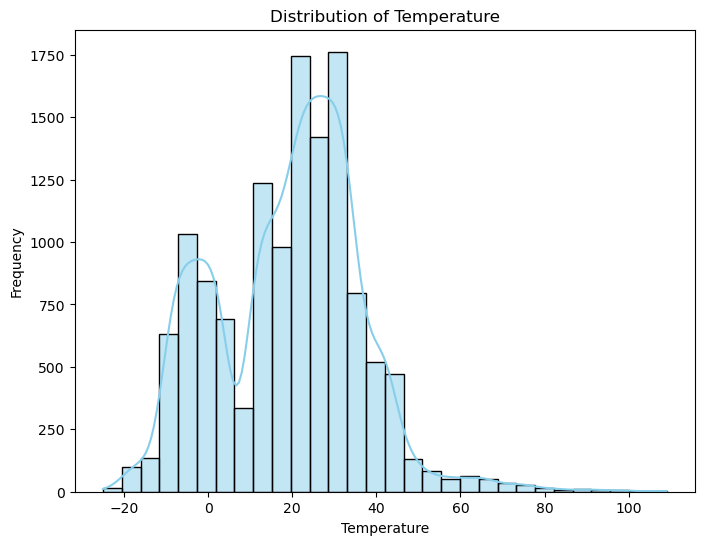

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histplot for "Temperature"

plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Interpretation:

## The data is slightly right-skewed, with most temperatures between between 0°C and 40°C.
## The highest frequency occurs around 20°C to 30°C, indicating the the most common temperature range.
## The temperature ranges from below -20°C to above 100°C.
## The HistPlot shows that moderate temperatures are more common in the dataset, with fewer very cold or extremely hot conditions.

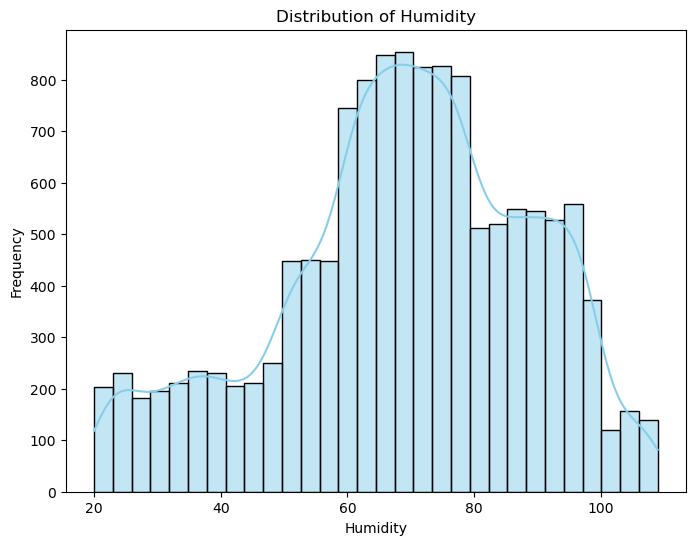

In [13]:
# Histplot for "Humidity"

plt.figure(figsize=(8, 6))
sns.histplot(df['Humidity'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

# Interpretation:

## The data shows normally distributed curve, peaking around 60-70% humidity.
## The humidity values ranges between 20% to 100%.
## The most common range is between 50% and 80% humidity.

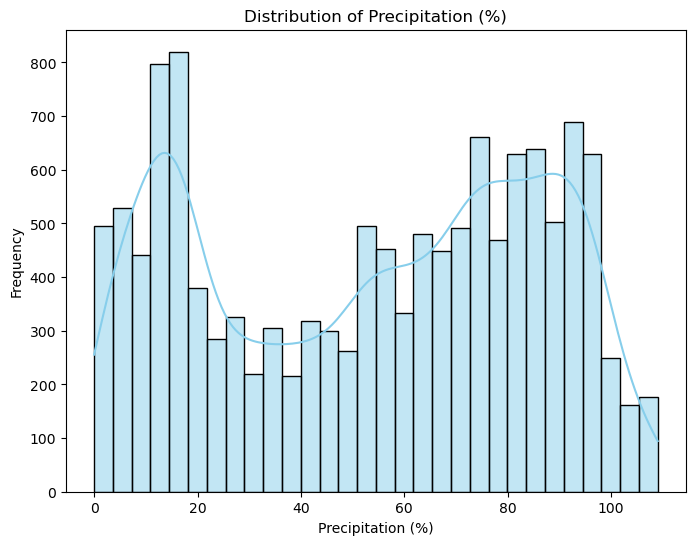

In [14]:
# Histplot for "Precipitation (%)"

plt.figure(figsize=(8, 6))
sns.histplot(df['Precipitation (%)'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Precipitation (%)')
plt.xlabel('Precipitation (%)')
plt.ylabel('Frequency')
plt.show()

# Interpretation:

## There are two peaks, one around 10-20% and another around 80-90%, indicating two common precipitation levels.
## There is a drop in frequency around 30-50%.
## Precipitation ranges the full range from 0% to 100%.
## The HistPlot shows that both dry (low precipitation) and wet (high precipitation) conditions as dominant patterns.

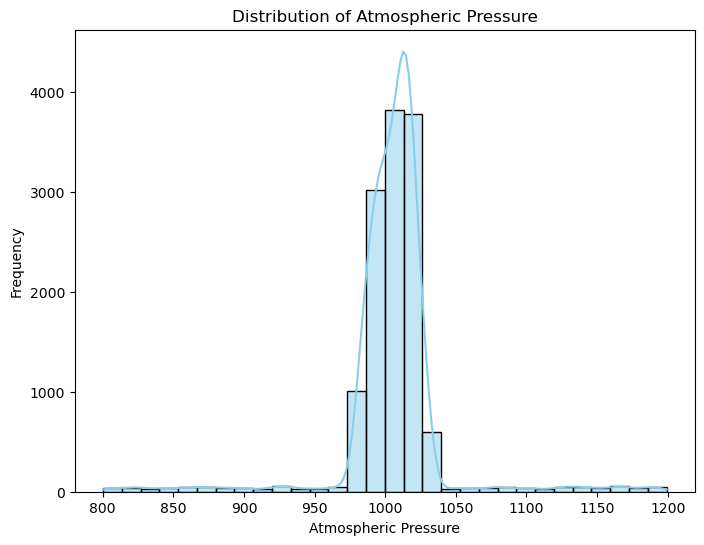

In [15]:
# Histplot for "Atmospheric Pressure"

plt.figure(figsize=(8, 6))
sns.histplot(df['Atmospheric Pressure'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Atmospheric Pressure')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Frequency')
plt.show()

# Interpretation:

## The data shows a normally distributed bell curve.
## The majority of values are centered around 1000, with a standard atmospheric pressure.
## The distribution has low frequencies at both lower and higher extremes, suggesting minimal variation from the average.
## It shows that atmospheric pressure values are close to the standard atmospheric level, with rare deviations.

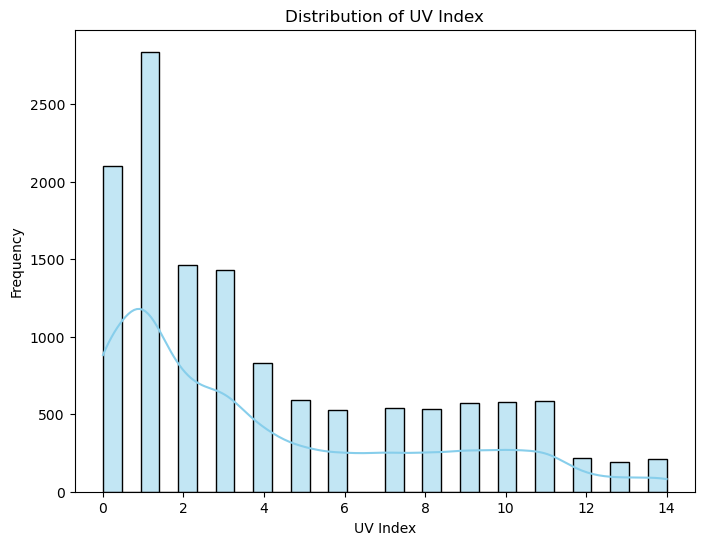

In [16]:
# Histplot for "UV Index"

plt.figure(figsize=(8, 6))
sns.histplot(df['UV Index'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of UV Index')
plt.xlabel('UV Index')
plt.ylabel('Frequency')
plt.show()

# Interpretation:

## Most data points ranges at lower UV Index values (0–2), stating low exposure to ultraviolet radiation.
## The frequency decreases as the UV Index increases, indicating fewer occurrences of higher UV levels.
## There are few instances of extreme UV Index values (10–14).
## This distribution shows that the data is skewed towards lower UV exposure levels, which is common in regions with mild climates or during periods with limited sunlight.

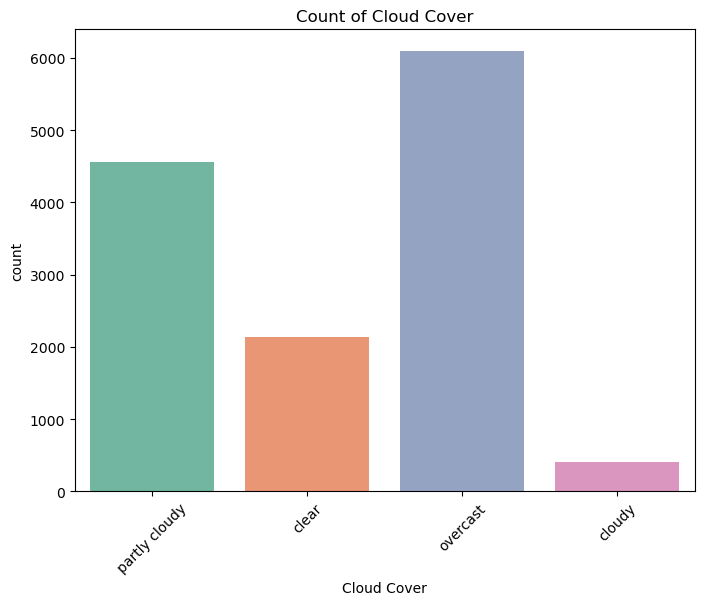

In [17]:
# Histplot for "Cloud Cover"

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cloud Cover', palette="Set2")
plt.title('Count of Cloud Cover')
plt.xticks(rotation=45)
plt.show()

# Interpretation:

## The "overcast" category has the highest count, indicating that fully cloudy skies dominate the data.
## "Partly cloudy" is the second most frequent category, followed by "clear" skies.
## "Cloudy" which is an intermediate between overcast and partly cloudy is the least common category.

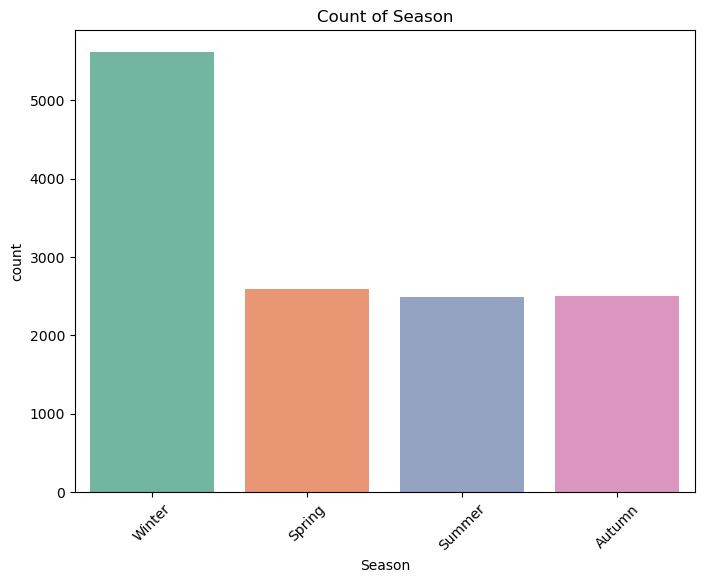

In [18]:
# Histplot for "Season"

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Season', palette="Set2")
plt.title('Count of Season')
plt.xticks(rotation=45)
plt.show()

# Interpretation:

## The majority of observations are recorded in winter season.
## Spring, summer, and autumn have relatively similar counts, which is lower than winter.

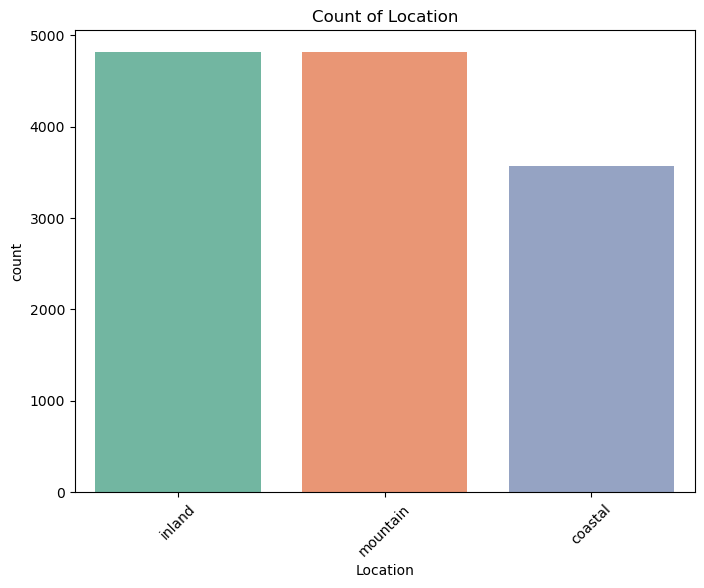

In [19]:
# Histplot for "Location"

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Location', palette="Set2")
plt.title('Count of Location')
plt.xticks(rotation=45)
plt.show()

# Interpretation:

## Inland and Mountain Locations are the two location types that have the highest and equal counts.
## Coastal areas have a lower count compared to inland and mountain locations.

# Segmented Univariate Analysis


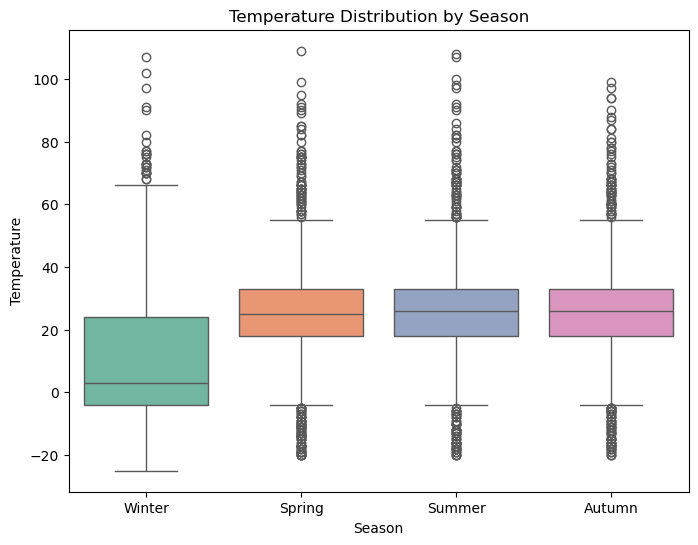

In [20]:
# BoxPlot for Temperature Distribution by Season

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Season', y='Temperature', palette='Set2')
plt.title('Temperature Distribution by Season')
plt.show()

# Interpretation:
## Winter has the lowest temperature range of a median below 20°C and a significant portion of temperatures below 0°C. It also has a few extreme outliers above 60°C.
## Spring, Summer, and Autumn shows higher median temperatures (above 20°C) compared to Winter. 
## Summer has the highest upper range, indicating warmer conditions.
## Outliers are present in all seasons.

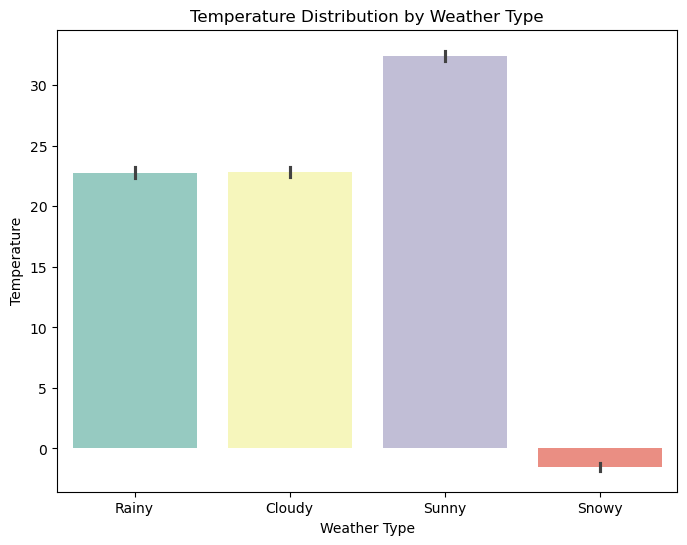

In [21]:
# BarPlot for Temperature Distribution by Weather Type

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Weather Type', y='Temperature', palette='Set3')
plt.title('Temperature Distribution by Weather Type')
plt.show()

# Interpretation:

## Sunny weather has the highest mean temperature (above 30°C), which indicates warm conditions.
## Rainy and Cloudy weather have moderate mean temperatures, with Cloudy being slightly lower than Rainy.
## Snowy weather has the lowest mean temperature (close to 0°C), indicating cold conditions.

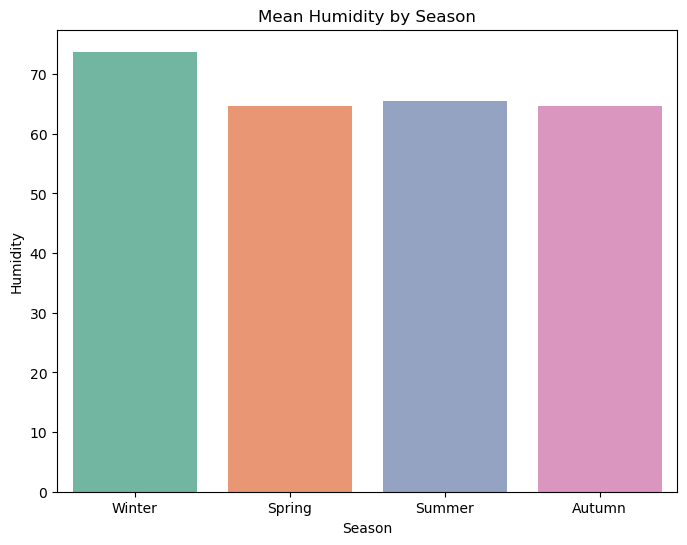

In [22]:
# BarPlot for Mean Humidity by Season

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Season', y='Humidity', palette='Set2', ci=None)
plt.title('Mean Humidity by Season')
plt.show()


# Interpretation:

## Winter has the highest mean humidity (around 70), where the climatic conditions is mostly humid.
## Spring, Summer, and Autumn have similar humidity levels but slightly below Winter, indicating moderate humidity across these seasons.
## Humidity is seasonally dependent.

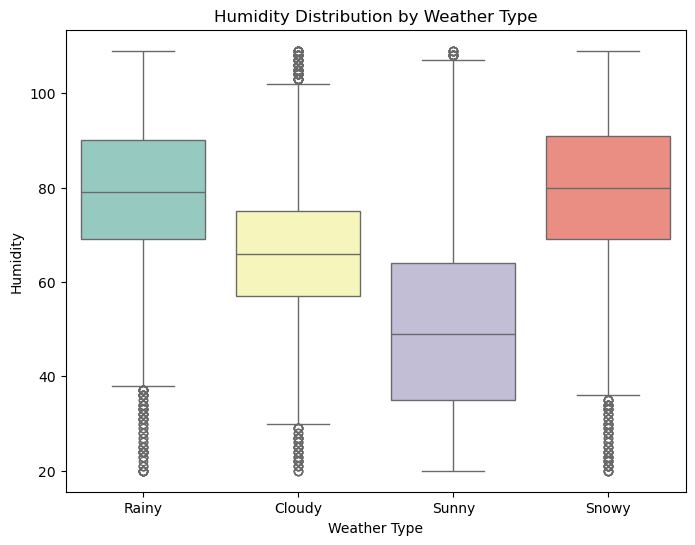

In [23]:
# BoxPlot for Humidity Distribution by Weather Type

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Weather Type', y='Humidity', palette='Set3')
plt.title('Humidity Distribution by Weather Type')
plt.show()

# Interpretation:
## The boxplot shows the humidity distribution across different weather types - Rainy, Cloudy, Sunny, and Snowy.
## Rainy weather has the highest median humidity whihc indicates high humidity levels.
## Snowy weather also shows high median humidity, with a slightly wider range than rainy conditions.
## Cloudy weather exhibits moderate humidity, with its median lower than rainy and snowy conditions, but still higher than sunny weather.
## Sunny weather has the lowest median humidity and the widest range, indicating greater variability in humidity levels.
## Outliers are present in all weather types, particularly for snowy and rainy conditions.


## To summarize rainy and snowy weather are associated with higher and more consistent humidity, while sunny weather is linked to lower and variable humidity levels.

# Bivariate Analysis

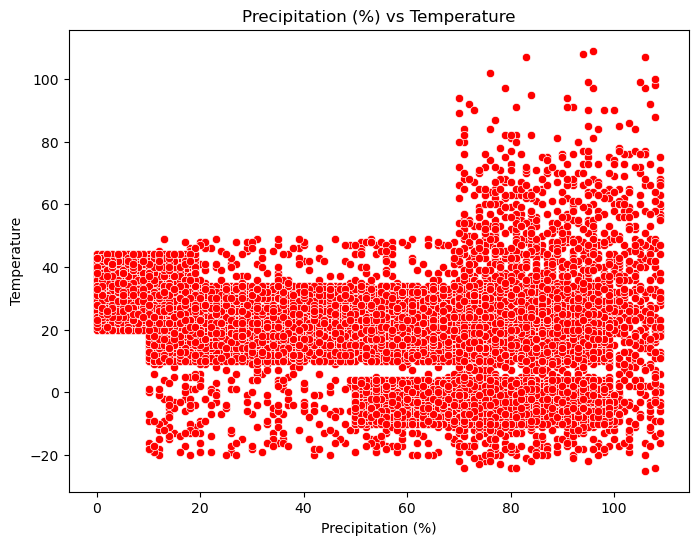

In [24]:
# ScatterPlot for Precipitation (%) vs Temperature

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Precipitation (%)', y='Temperature', color='red')
plt.title('Precipitation (%) vs Temperature')
plt.show()

# Interpretation:
## Temperature values range from below -20°C to over 100°C, but most points cluster between -10°C and 40°C.
## Precipitation (%) covers the full range from 0% to 100%, with no relationship to temperature.
## There is no strong relationship between precipitation percentage and temperature because the data points are evenly distributed across the precipitation scale.

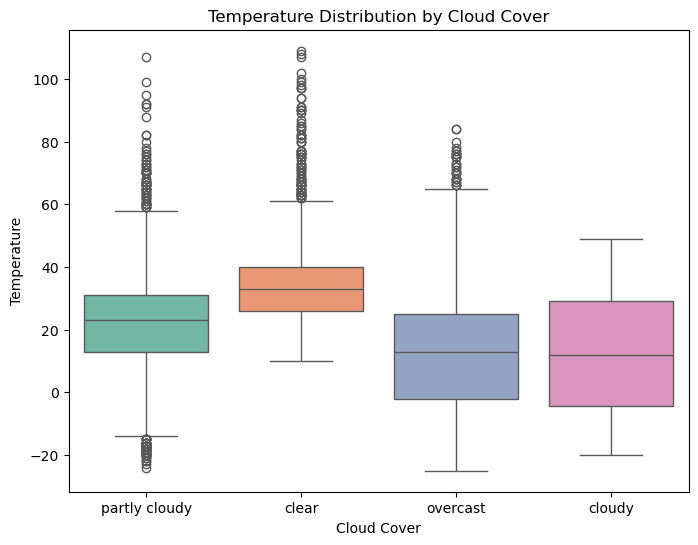

In [25]:
# BoxPlot for Temperature Distribution by Cloud Cover

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cloud Cover', y='Temperature', palette='Set2')
plt.title('Temperature Distribution by Cloud Cover')
plt.show()

# Interpretation:
## The boxplot shows the distribution of temperature across different cloud cover categories - partly cloudy, clear, overcast, and cloudy.
## Clear skies show the highest median temperature (35°C to 40°C), indicating more consistent temperatures.
## Overcast conditions have the lowest median temperature (-°C to 25°C) and a slightly wider spread, indiccating more variability.
## Partly cloudy and cloudy conditions have similar medians(30°C), but the range of temperatures is broader for partly cloudy, indicating more variation.
## Outliers are present in all categories, particularly in clear skies and overcast conditions, indicating extreme temperatures.
## The clear skies correlate with higher temperatures, while overcast skies are associated with cooler conditions.

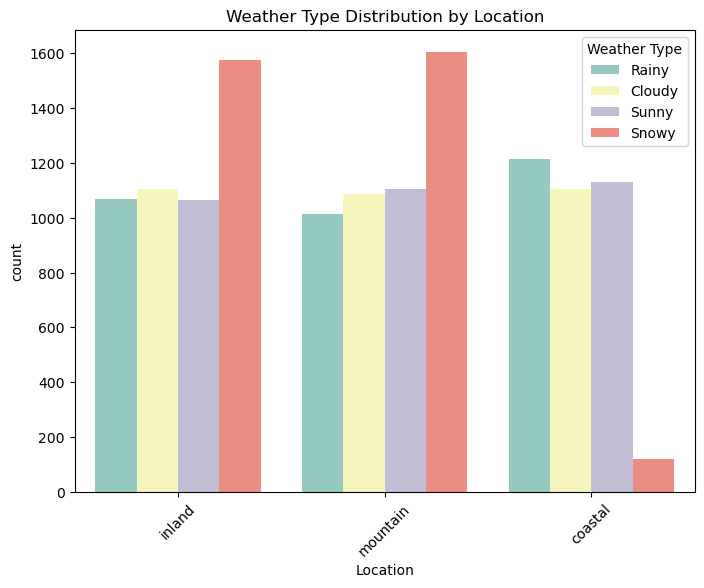

In [26]:
# Countplot for Weather Type Distribution by Location

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Location', hue='Weather Type', palette='Set3')
plt.title('Weather Type Distribution by Location')
plt.xticks(rotation=45)
plt.show()

# Interpretation:
## The bar plot compares weather types across three locations - inland, mountain, and coastal.  
## Sunny weather is most common in both inland and mountain regions.
## Cloudy and rainy weather are more evenly distributed across all locations.
## Snowy weather is prominent in mountain regions but rare in coastal areas.

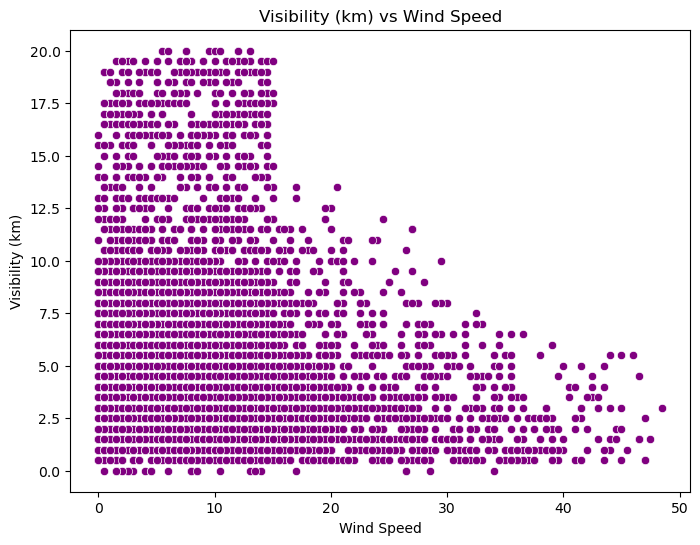

In [27]:
# ScatterPlot for Visibility (km) vs Wind Speed

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Wind Speed', y='Visibility (km)', color='purple')
plt.title('Visibility (km) vs Wind Speed')
plt.show()

# Interpretation:
## The scatterplot shows the relationship between Wind Speed (x-axis) and Visibility (km) (y-axis). As wind speed increases, visibility generally decreases, with fewer high visibility points observed at higher wind speeds. At lower wind speeds, visibility varies widely, indicating other factors might also influence visibility.

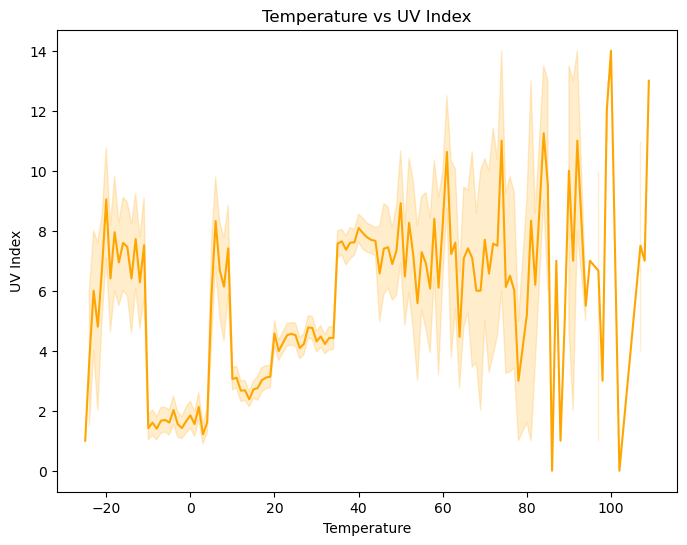

In [28]:
# LinePlot for Temperature vs UV Index

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temperature', y='UV Index', color='orange')
plt.title('Temperature vs UV Index')
plt.show()

# Interpretation:
## The plot shows how the UV index changes with temperature. At low temperatures(0°C), the UV index is moderately high but stable. As temperatures rise, the UV index fluctuates more, with significant variability and sharp peaks at higher temperatures, indicating environmental factors influencing UV intensity.

# Multivariate Analysis - Correlation

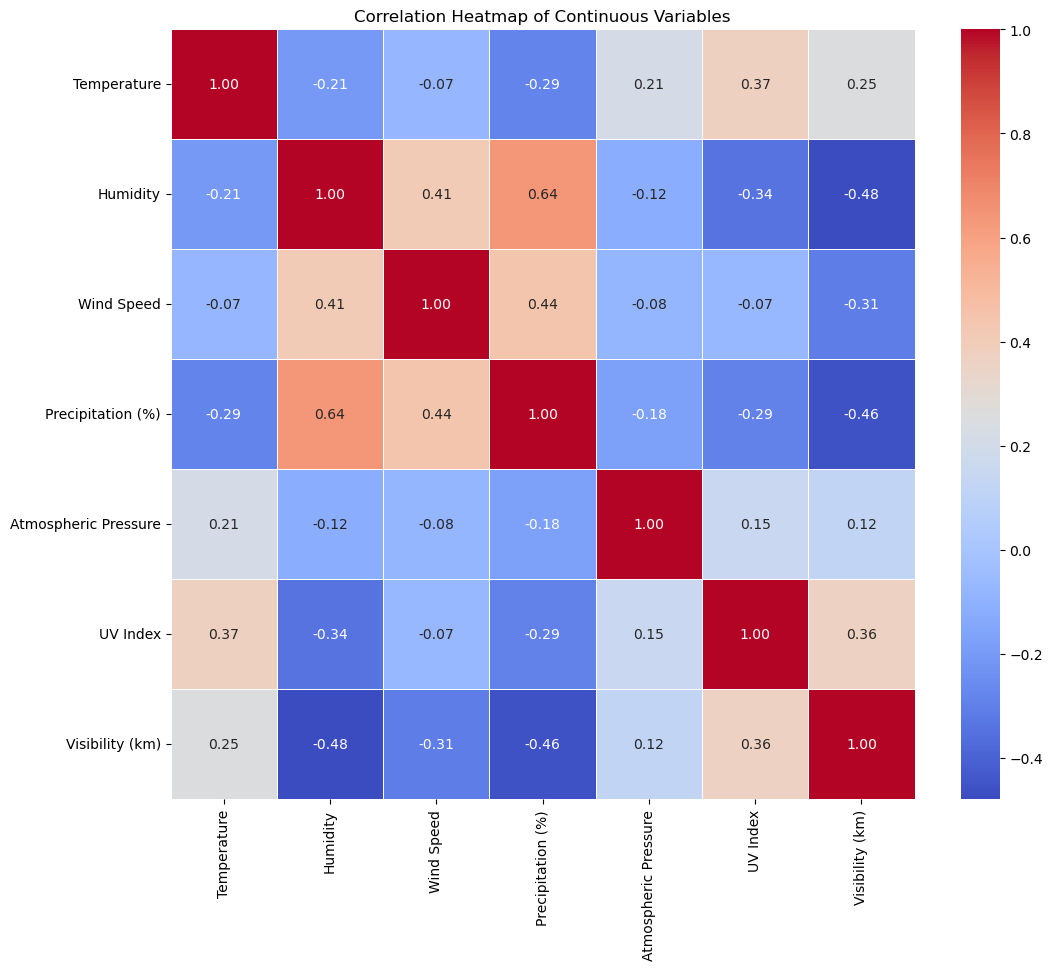

In [29]:
# Analysing correlation of continous variables in the 'df' dataframe using heatmap

# Defining the numeric columns for correlation analysis
numeric_cols = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)','Atmospheric Pressure', 'UV Index', 'Visibility (km)']]

# Calculating correlation matrix
correlation_matrix = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()


# Interpretation:


## Temperature:

### Temperature has a negative correlation with Humidity (-0.21) and Precipitation (-0.29) and a positive correlation with UV Index (0.37).
### Warmer temperatures are often associated with drier and less rainy conditions.
### Higher temperatures are often accompanied by higher UV exposure, typically during clear, sunny days.

## Humidity:

### Humidity has a positive correlation with Precipitation (0.64) and a positive correlation with Wind Speed (0.41).
### High humidity is an indicatioin to rainfall.
    
## Precipitation (%):

### Precipitation has a negative correlation with Visibility (-0.46) and moderate correlation with Wind Speed (0.44).
### Rain or snow reduces visibility significantly and storms are often accompanied by strong winds.

## UV Index:

### UV index has a negative correlation with Humidity (-0.34) and Precipitation (-0.29).
### High UV levels are associated with clear weather, while overcast or rainy conditions reduce UV radiation.

## Visibility:

### Visibility has a negative correlation with Precipitation (-0.46) and Humidity (-0.48). 
### And a positive correlation with UV Index (0.36) where better visibility indicates clearer skies, with higher UV exposure.
    
## Wind Speed:

### Wind Speed has a positive correlation with Precipitation (0.44) where windy conditions are associated with rainfall, especially during storms.
    
## Atmospheric Pressure:

### Atmospheric Pressure has a weak correlations with other variables, suggesting limited influence on other specific weather features.

# Visualizing Data Trends

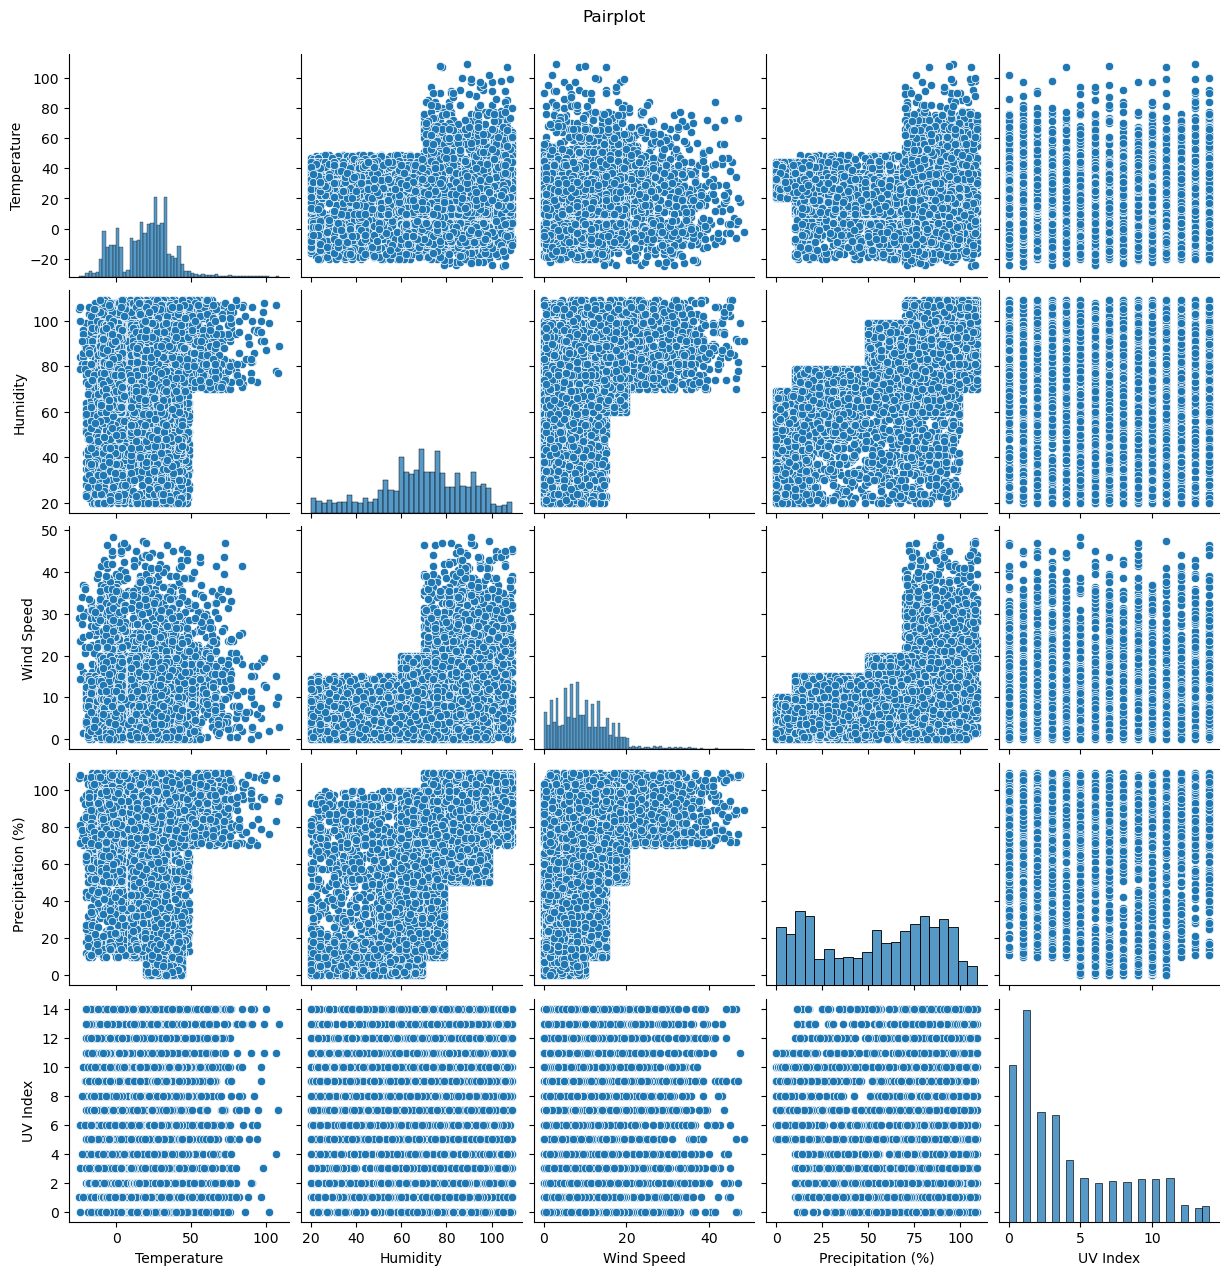

In [30]:
# Pairplot for multiple numerical variables in the dataset

sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'UV Index']])
plt.suptitle('Pairplot', y=1.02)
plt.show()

# Interpretation:


## Temperature vs. Humidity:

###  There is a strong negative correlation between Temperature and Humidity as higher temperatures are associated with lower humidity levels which  represents clear, sunny weather where heat causes reduced moisture in the air.

## Temperature vs. Precipitation:

### There is an inverse relationship between Temperature and Precipitation. Lower temperatures often correspond to higher precipitation which indicates rainy or stormy weather conditions, especially in colder climates.

## Temperature vs. Wind Speed:

### Temperature and Wind Speed shows weak correlation, but is shows that slightly higher wind speeds occur at moderate temperatures.
    
## Humidity vs. Precipitation:

### There is a positive correlation between Humidity and Precipitation as higher humidity levels typically lead to higher precipitation. This states that humid conditions are indcation to rain, making these features critical for weather classification.
                                                                                                          
## UV Index vs. Precipitation and Humidity:

### The Pairplt shows that UV index is low when precipitation and humidity are high.
                                                                                                          
## Wind Speed vs. Precipitation: 

### There is a Weak positive correlation between Wind Speed and Precipitation where higher wind speeds occur during rainy conditions.

# Summary Statistics

In [31]:
# Summary statistics for numerical columns

num_stat = df.describe()

# Summary statistics for Categorical columns

categorical_stat = df.describe(include=['object'])

# Displaying unique values and frequencies for categorical columns

unique_values = {column: df[column].value_counts() for column in df.select_dtypes(include=['object']).columns}

print("Numerical Summary:")
print(num_stat)

print("\nCategorical Summary:")
print(categorical_stat)

print("\nUnique Values and Frequencies for Categorical Columns:")
for column, values in unique_values.items():
    print(f"\n{column}:\n{values}")

Numerical Summary:
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000    

# 4) Feature Engineering, Handling categorical variables and encoding

## Feature Engineering

In [32]:
# Categorizing visibility into categories and creating a new column
def visibility(visibility):
    if visibility < 3:
        return 'Poor'
    elif 3 <= visibility < 8:
        return 'Moderate'
    else:
        return 'Clear'

# Creating a new column
df['Visibility Category'] = df['Visibility (km)'].apply(visibility)

# Checking unique categories
df['Visibility Category'].unique()

array(['Moderate', 'Clear', 'Poor'], dtype=object)

In [33]:
df[['Visibility Category']].head()

,Visibility Category
0,Moderate
1,Clear
2,Moderate
3,Poor
4,Poor


In [34]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Visibility Category
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,Moderate
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,Clear
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,Moderate
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,Poor
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,Poor
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,Moderate
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,Clear
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,Poor


# One-Hot Encoding

In [35]:
# Getting the dummy variables for the features "Cloud Cover","season","Visibility Category" and "Location" in a new varible encoded_df

encoded_df = pd.get_dummies(df[["Cloud Cover","Season","Location","Visibility Category"]],drop_first = True)   
encoded_df=encoded_df.astype("int")

# Add the result to the original df dataframe

df = pd.concat([df,encoded_df],axis=1)


df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,...,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,...,0,0,1,0,0,1,1,0,1,0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,...,0,0,1,1,0,0,1,0,0,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,...,0,0,0,1,0,0,0,1,1,0
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,...,0,0,0,1,0,0,0,0,0,1
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,...,0,1,0,0,1,0,0,1,0,1
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,...,1,0,0,0,0,1,0,0,1,0
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,...,0,1,0,0,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,...,0,1,0,0,0,1,1,0,0,1


# Label Encoding

In [36]:
# Label Encoding for weather type
label_encoder = LabelEncoder()
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])   # Where 0: Cloudy, 1: Rainy, 2: Snowy, 3: Sunny

# Display updated data
df["Weather Type"]

0        1
1        0
2        3
3        3
4        1
        ..
13195    1
13196    2
13197    0
13198    2
13199    1
Name: Weather Type, Length: 13200, dtype: int32

In [37]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,...,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,...,0,0,1,0,0,1,1,0,1,0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,...,0,0,1,1,0,0,1,0,0,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,...,0,0,0,1,0,0,0,1,1,0
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,...,0,0,0,1,0,0,0,0,0,1
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,...,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,...,0,1,0,0,1,0,0,1,0,1
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,...,1,0,0,0,0,1,0,0,1,0
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,...,0,1,0,0,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,...,0,1,0,0,0,1,1,0,0,1


In [38]:
# Deleting all OneHot Encoded columns as it has another new column created

df.drop(["Cloud Cover","Season","Location","Visibility Category","Visibility (km)"],axis=1,inplace=True)

df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
0,14.0,73,9.5,82.0,1010.82,2,1,0,0,1,0,0,1,1,0,1,0
1,39.0,96,8.5,71.0,1011.43,7,0,0,0,1,1,0,0,1,0,0,0
2,30.0,64,7.0,16.0,1018.72,5,3,0,0,0,1,0,0,0,1,1,0
3,38.0,83,1.5,82.0,1026.25,7,3,0,0,0,1,0,0,0,0,0,1
4,27.0,74,17.0,66.0,990.67,1,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1,0,1,0,0,1,0,0,1,0,1
13196,-1.0,76,3.5,23.0,1067.23,1,2,1,0,0,0,0,1,0,0,1,0
13197,30.0,77,5.5,28.0,1012.69,3,0,0,1,0,0,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2,0,1,0,0,0,1,1,0,0,1


In [39]:
# Displaying the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   13200 non-null  float64
 1   Humidity                      13200 non-null  int64  
 2   Wind Speed                    13200 non-null  float64
 3   Precipitation (%)             13200 non-null  float64
 4   Atmospheric Pressure          13200 non-null  float64
 5   UV Index                      13200 non-null  int64  
 6   Weather Type                  13200 non-null  int32  
 7   Cloud Cover_cloudy            13200 non-null  int32  
 8   Cloud Cover_overcast          13200 non-null  int32  
 9   Cloud Cover_partly cloudy     13200 non-null  int32  
 10  Season_Spring                 13200 non-null  int32  
 11  Season_Summer                 13200 non-null  int32  
 12  Season_Winter                 13200 non-null  int32  
 13  L

# 5)  Unsupervised Learning using K-Means Clustering

In [40]:
# Creating a new dataframe to do clustering

cluster_df = df.copy()

print(cluster_df)

       Temperature  Humidity  Wind Speed  Precipitation (%)  \
0             14.0        73         9.5               82.0   
1             39.0        96         8.5               71.0   
2             30.0        64         7.0               16.0   
3             38.0        83         1.5               82.0   
4             27.0        74        17.0               66.0   
...            ...       ...         ...                ...   
13195         10.0        74        14.5               71.0   
13196         -1.0        76         3.5               23.0   
13197         30.0        77         5.5               28.0   
13198          3.0        76        10.0               94.0   
13199         -5.0        38         0.0               92.0   

       Atmospheric Pressure  UV Index  Weather Type  Cloud Cover_cloudy  \
0                   1010.82         2             1                   0   
1                   1011.43         7             0                   0   
2                 

# Feature scaling for Un-Supervised Learning

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

cluster_df[["Temperature", "Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index"]] = scaler.fit_transform(cluster_df[["Temperature", "Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index"]])


cluster_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,1,0,0,1,0,0,1,1,0,1,0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,0,0,0,1,1,0,0,1,0,0,0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,3,0,0,0,1,0,0,0,1,1,0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,3,0,0,0,1,0,0,0,0,0,1
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,1,0,1,0,0,0,1,0,1,0,1


In [42]:
# unique values of each columns in the dataframe(to determine the repetitive or same values)

cluster_df.apply(lambda x:x.unique())

Temperature                     [-0.29493119036248006, 1.143034840303828, 0.62...
Humidity                        [0.21240350841889963, 1.3513848242070519, -0.2...
Wind Speed                      [-0.04808565352125299, -0.19283608145296102, -...
Precipitation (%)               [0.8876291302333902, 0.5432908568176041, -1.17...
Atmospheric Pressure            [0.13420290568425122, 0.1506015576245716, 0.34...
UV Index                        [-0.5201040729554158, 0.7764236810503796, 0.25...
Weather Type                                                         [1, 0, 3, 2]
Cloud Cover_cloudy                                                         [0, 1]
Cloud Cover_overcast                                                       [0, 1]
Cloud Cover_partly cloudy                                                  [1, 0]
Season_Spring                                                              [0, 1]
Season_Summer                                                              [0, 1]
Season_Winter   

In [43]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   13200 non-null  float64
 1   Humidity                      13200 non-null  float64
 2   Wind Speed                    13200 non-null  float64
 3   Precipitation (%)             13200 non-null  float64
 4   Atmospheric Pressure          13200 non-null  float64
 5   UV Index                      13200 non-null  float64
 6   Weather Type                  13200 non-null  int32  
 7   Cloud Cover_cloudy            13200 non-null  int32  
 8   Cloud Cover_overcast          13200 non-null  int32  
 9   Cloud Cover_partly cloudy     13200 non-null  int32  
 10  Season_Spring                 13200 non-null  int32  
 11  Season_Summer                 13200 non-null  int32  
 12  Season_Winter                 13200 non-null  int32  
 13  L

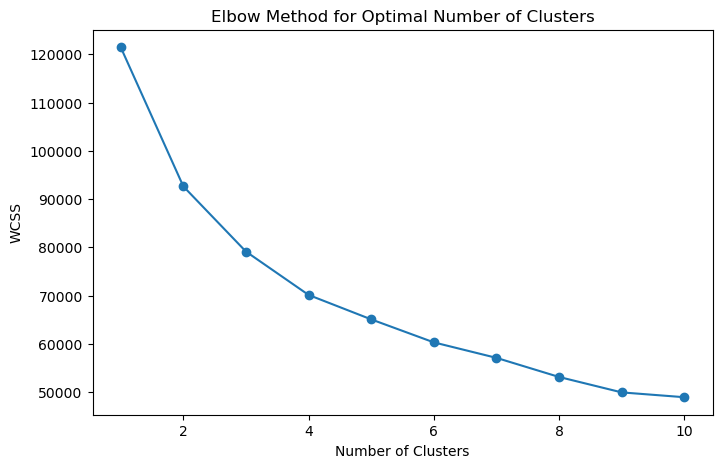

The optimal number of clusters is: 4
   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.294931  0.212404   -0.048086           0.887629              0.134203   
1     1.143035  1.351385   -0.192836           0.543291              0.150602   
2     0.625367 -0.233285   -0.409962          -1.178401              0.346579   
3     1.085516  0.707613   -1.206089           0.887629              0.549008   
4     0.452811  0.261924    1.037543           0.386773             -0.407490   

   UV Index  Weather Type  Cloud Cover_cloudy  Cloud Cover_overcast  \
0 -0.520104             1                   0                     0   
1  0.776424             0                   0                     0   
2  0.257813             3                   0                     0   
3  0.776424             3                   0                     0   
4 -0.779410             1                   0                     1   

   Cloud Cover_partly cloudy  Season_Spring  Seas

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator  # We use Kneed to detect the elbow curve automatically

X = cluster_df  

# Specifying a wider range of clusters directly
cluster_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
wcss = []  

# Determining the optimal number of clusters using the elbow method
for i in cluster_numbers:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_numbers, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Using KneeLocator to find the elbow point
knee = KneeLocator(cluster_numbers, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee.elbow  

# Printing the optimal number of clusters
if optimal_clusters is not None:
    print(f'The optimal number of clusters is: {optimal_clusters}')

    # Fitting K-means using the optimal number of clusters on the original data
    kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(X)

    # Adding cluster labels to the original dataframe
    cluster_df['Cluster'] = clusters

    # Displaying the dataframe with clusters
    print(cluster_df.head())
else:
    print('No elbow point detected')


In [45]:
# Groupping the original dataframe by clusters and calculate mean for each group

cluster_pro = cluster_df.groupby('Cluster').mean()  # or median/mode for categorical variables
print(cluster_pro)

         Temperature  Humidity  Wind Speed  Precipitation (%)  \
Cluster                                                         
0           0.683571 -1.143424   -0.643253          -1.157777   
1           0.446594  0.759729    0.785075           0.857873   
2          -1.229922  0.477801    0.037663           0.667531   
3           0.114130 -0.290318   -0.336518          -0.587547   

         Atmospheric Pressure  UV Index  Weather Type  Cloud Cover_cloudy  \
Cluster                                                                     
0                    0.480378  1.084295      2.910986            0.048643   
1                    0.010599 -0.073327      1.125475            0.006790   
2                   -0.643543 -0.641771      1.958333            0.031401   
3                    0.201221 -0.276761      0.117148            0.042399   

         Cloud Cover_overcast  Cloud Cover_partly cloudy  Season_Spring  \
Cluster                                                                

### Interpretation:

### Cluster 0: High temperature, low humidity, and high UV index.
### Cluster 1: Moderate temperature, moderate humidity, and overcast conditions.
### Cluster 2: Low temperature, high humidity, and rainy weather.
### Cluster 3: Clear skies with high atmospheric pressure.

In [46]:
print(X.columns)

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Weather Type',
       'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Location_inland', 'Location_mountain',
       'Visibility Category_Moderate', 'Visibility Category_Poor', 'Cluster'],
      dtype='object')


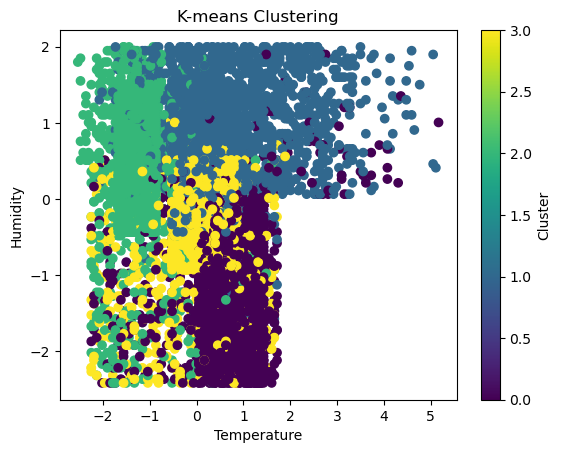

In [47]:
# Visualizing clustering (using the first two features)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel("Temperature") 
plt.ylabel("Humidity")  
plt.colorbar(label='Cluster')
plt.show()

In [48]:
print(cluster_df[['Cluster']].value_counts())

Cluster
1          3682
2          3312
3          3184
0          3022
dtype: int64


In [49]:
from sklearn.metrics import silhouette_score

# Cluster labels
labels = cluster_df['Cluster']   

# Calculating silhouette score
silhouette = silhouette_score(X, labels)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette}')

Silhouette Score for 4 clusters: 0.2948613407093141


## Clustering technique doesn't work with this dataset as it has labeled weather types (e.g., "Rainy," "Snowy").

## A silhouette score of only 0.211 indicates that the clustering result is moderate, using classification algorithms (e.g., decision trees, SVMs) is more appropriate than clustering.

## Weather features like temperature and humidity overlap between conditions, making it hard to find meaningful separation.

# 6) Test-Train Split

In [50]:
# Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Putting feature variable to X

X = df.drop(["Weather Type"], axis=1)

X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
0,14.0,73,9.5,82.0,1010.82,2,0,0,1,0,0,1,1,0,1,0
1,39.0,96,8.5,71.0,1011.43,7,0,0,1,1,0,0,1,0,0,0
2,30.0,64,7.0,16.0,1018.72,5,0,0,0,1,0,0,0,1,1,0
3,38.0,83,1.5,82.0,1026.25,7,0,0,0,1,0,0,0,0,0,1
4,27.0,74,17.0,66.0,990.67,1,0,1,0,0,0,1,0,1,0,1


In [52]:
# Putting response variable to y

y = df['Weather Type']

y.head()

0    1
1    0
2    3
3    3
4    1
Name: Weather Type, dtype: int32

In [53]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# 7) Supervised Learning

# Feature Scaling for Supervised Learning

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Feature scaling for training set

X_train[["Temperature", "Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index"]] = scaler.fit_transform(X_train[["Temperature", "Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index"]])

X_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
10163,0.360902,0.617978,0.360825,0.770642,0.500539,0.214286,0,1,0,0,1,0,0,1,1,0
12929,0.526316,0.550562,0.072165,0.394495,0.105553,0.857143,1,0,0,1,0,0,1,0,1,0
5735,0.360902,0.752809,0.371134,0.596330,0.529924,0.071429,0,0,1,1,0,0,1,0,0,1
440,0.187970,0.921348,0.721649,0.825688,0.472007,0.357143,0,1,0,0,0,1,0,1,1,0
2018,0.496241,0.752809,0.360825,0.917431,0.541682,0.571429,0,0,1,0,1,0,1,0,0,0


In [55]:
# Feature scaling for testing set

X_test[["Temperature", "Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index"]] = scaler.transform(X_test[["Temperature", "Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index"]])

X_test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Visibility Category_Moderate,Visibility Category_Poor
4111,0.353383,0.202247,0.092784,0.055046,0.554269,0.642857,0,0,0,0,0,0,1,0,0,0
10607,0.646617,0.831461,0.298969,0.761468,0.565250,0.714286,0,0,0,0,1,0,1,0,1,0
7372,0.481203,0.348315,0.041237,0.110092,0.564197,0.571429,0,0,1,1,0,0,0,1,0,0
11786,0.127820,0.662921,0.134021,0.825688,0.484994,0.000000,0,1,0,0,0,1,1,0,0,1
12227,0.338346,0.831461,0.206186,1.000000,0.570616,0.785714,0,0,1,1,0,0,0,1,0,0


In [56]:
# unique values of each columns in the dataframe(to determine the repetitive or same values)

df.apply(lambda x:x.unique())

Temperature                     [14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0...
Humidity                        [73, 96, 64, 83, 74, 55, 97, 85, 45, 43, 59, 8...
Wind Speed                      [9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 2.0,...
Precipitation (%)               [82.0, 71.0, 16.0, 66.0, 26.0, 86.0, 96.0, 107...
Atmospheric Pressure            [1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1...
UV Index                        [2, 7, 5, 1, 0, 8, 11, 3, 9, 4, 13, 10, 14, 6,...
Weather Type                                                         [1, 0, 3, 2]
Cloud Cover_cloudy                                                         [0, 1]
Cloud Cover_overcast                                                       [0, 1]
Cloud Cover_partly cloudy                                                  [1, 0]
Season_Spring                                                              [0, 1]
Season_Summer                                                              [0, 1]
Season_Winter   

# Model Building using Random Forest with Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, mean_squared_error

# Initializing the RandomForestClassifier model
Ran_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(Ran_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Training the model on the training data
Ran_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = Ran_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Cross-Validation Scores: [0.91341991 0.90963203 0.91125541 0.91720779 0.9215368 ]
Mean Cross-Validation Accuracy: 0.9146103896103895
Accuracy: 0.9138888888888889
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       955
           1       0.90      0.91      0.90       982
           2       0.94      0.94      0.94      1033
           3       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



# Model Building using Logistic Regression with Cross Validation

In [58]:
from sklearn.linear_model import LogisticRegression


# Initializing the Logistic Regression model
log_model = LogisticRegression(max_iter=100)

# Performing cross-validation
cv_scores = cross_val_score(log_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Training the model on the training data
log_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = log_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Cross-Validation Scores: [0.85335498 0.85443723 0.85551948 0.86147186 0.86093074]
Mean Cross-Validation Accuracy: 0.8571428571428571
Accuracy: 0.8568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       955
           1       0.85      0.80      0.83       982
           2       0.87      0.93      0.90      1033
           3       0.92      0.85      0.88       990

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



# Model Building using Support Vector Machine (SVM) with Cross Validation

In [59]:
from sklearn.svm import SVC


# Initializing the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can also try other kernels like 'rbf', 'poly', etc.

# Performing cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Training the model on the training data
svm_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = svm_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Cross-Validation Scores: [0.88257576 0.87987013 0.88636364 0.88852814 0.89177489]
Mean Cross-Validation Accuracy: 0.8858225108225108
Accuracy: 0.8845959595959596
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       955
           1       0.87      0.84      0.86       982
           2       0.91      0.94      0.92      1033
           3       0.94      0.88      0.91       990

    accuracy                           0.88      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.88      0.88      3960



# Model Building using k-Nearest Neighbors (k-NN) with Cross Validation

In [60]:
from sklearn.neighbors import KNeighborsClassifier


# Initializing the k-Nearest Neighbors (k-NN) model
k = 3  # You can choose the value of k based on your needs
knn_model = KNeighborsClassifier(n_neighbors=k)

# Performing cross-validation
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Training the model on the training data
knn_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Cross-Validation Scores: [0.88474026 0.87662338 0.88257576 0.88744589 0.90097403]
Mean Cross-Validation Accuracy: 0.8864718614718614
Accuracy: 0.8843434343434343
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       955
           1       0.85      0.86      0.85       982
           2       0.94      0.93      0.93      1033
           3       0.94      0.88      0.91       990

    accuracy                           0.88      3960
   macro avg       0.89      0.88      0.88      3960
weighted avg       0.89      0.88      0.88      3960



# Model Building using XGBoost with Cross Validation

In [61]:
from xgboost import XGBClassifier


# Initializing the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Performing cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

# Training the model on the entire training data
xgb_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Displaying the accuracy and classification report
print("Accuracy on Test Set:", accuracy)
print("Classification Report on Test Set:\n", report)

Cross-validation scores: [0.91612554 0.91071429 0.91341991 0.91450216 0.91883117]
Mean cross-validation accuracy: 0.9147186147186147
Accuracy on Test Set: 0.9148989898989899
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       955
           1       0.90      0.91      0.90       982
           2       0.93      0.94      0.94      1033
           3       0.94      0.91      0.93       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.92      0.91      0.91      3960



# 8) Hyperparameter Tuning with XGBoost

## XGBoost gives the best accuracy out of all the models and hence Hyperparameter Tuning is done with XGBoost

In [62]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV


# Initializing the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Setting up the parameter distribution for Random Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initializing Random Search
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fitting the model
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

y_pred = best_estimator.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2}
Accuracy: 0.9133838383838384
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       955
           1       0.91      0.90      0.91       982
           2       0.93      0.94      0.94      1033
           3       0.94      0.91      0.93       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



# 9) Insights 

# Insights obtained from Univariate analysis:

### -  The temperature data is slightly right-skewed, with most values between 0°C and 40°C, peaking around 20-30°C. Extreme cold or heat is less common.
### -  Humidity is normally distributed, peaking at 60-70%, with the majority of values between 50% and 80%.
### -  Precipitation is bimodal, with common values at both low (10-20%) and high (80-90%) levels, and lower frequencies between 30-50%.
### -  Atmospheric pressure is centered around 1000, with minimal variation from the standard atmospheric level.
### -  UV Index is mostly low (0-2), with fewer instances of higher levels, indicating limited sun exposure.
### -  Skies are mostly overcast, followed by partly cloudy, with clear skies being less frequent.
### -  Winter dominates the dataset, with spring, summer, and autumn having similar, lower counts.
### -  Inland and Mountain locations have the highest counts, while Coastal areas are less frequent.

# Insights obtained from Segmented Univariate analysis

### -  Winter has the highest mean humidity, around 70%, indicating humid conditions.
### -  Spring, Summer, and Autumn have moderate humidity levels, slightly below Winter.
### -  Humidity is seasonally dependent.
### -  Rainy and Snowy weather have high and consistent median humidity, with Snowy weather showing a wider range.
### -  Cloudy weather has moderate humidity, lower than Rainy and Snowy but higher than Sunny.
### -  Sunny weather has the lowest median humidity and the greatest variability.
### -  Outliers are present in all weather types, especially in Snowy and Rainy conditions.

# Insights obtained from Bivariate analysis

### - Clear skies have the highest median temperature (35-40°C), indicating more consistent warmth, while overcast skies are cooler (0°C to 25°C) with more variability.
### - Partly cloudy and cloudy conditions have similar medians (30°C), but partly cloudy shows more temperature variation.
### - Outliers in temperature are observed in all categories, particularly in clear and overcast conditions.
### - Clear skies are linked to higher temperatures, while overcast skies are associated with cooler conditions.
### - Sunny weather is most common in inland and mountain regions, while snowy weather is rare in coastal areas.
### - Wind speed negatively impacts visibility, with fewer high visibility points at higher wind speeds, and more variation at lower wind speeds.
### - UV index increases with temperature, showing more fluctuations and sharp peaks at higher temperatures.

# Insights obtained from Multivariate analysis

### - Temperature is negatively correlated with humidity and precipitation, but positively correlated with UV index. Warmer temperatures are linked to drier conditions and higher UV exposure.
### - Humidity is positively correlated with precipitation and wind speed, indicating that higher humidity often signals rain and stronger winds.
### -Precipitation negatively affects visibility and is moderately correlated with wind speed, suggesting storms reduce visibility and bring stronger winds.
### - UV index is negatively correlated with humidity and precipitation, with high UV levels typically occurring in clear weather, while overcast or rainy conditions reduce UV exposure.
### - Visibility is negatively correlated with precipitation and humidity, but positively with UV index, indicating clearer skies and higher UV exposure lead to better visibility.
### - Wind speed is positively correlated with precipitation, particularly during storms.
### - Atmospheric pressure shows weak correlations with other weather variables, indicating minimal influence on specific weather features.

# 10) Recommendations:

## Weather Forecasting & Planning:
### - Monitor temperature patterns to predict drier conditions and higher UV exposure, especially during warm weather.
### - Track humidity levels, especially in winter, to improve rainfall prediction and identify areas at risk for rain or snow.
## UV Exposure Awareness:
### - Promote sun safety when temperatures rise, particularly on sunny days.
### - Issue UV warnings for higher UV levels, especially in inland and mountain areas.
## Visibility and Wind Speed:
### - Monitor wind and precipitation to anticipate storms that can reduce visibility and cause disruptions.
### - Improve visibility forecasting for safer travel, especially during windy and rainy conditions.
## Seasonal Considerations:
### - Adjust heating systems for colder, more humid winter conditions, which may increase energy usage.
### - Prepare for respiratory risks during winter’s high humidity and emphasize hydration and UV protection in warmer seasons.
## Location-Specific Weather Predictions:
### - Expect variable weather in coastal areas, and sunny, warm conditions in inland and mountain regions. Adjust public health measures accordingly.
### - Prepare for winter storms in mountain areas, with a focus on snow accumulation and cold-related risks.
## Cloud Cover and Temperature:
### - Predict warmer, sunnier conditions with clear skies and cooler conditions with overcast weather to guide clothing and energy usage.
### - Be aware of temperature changes for outdoor events based on the cloud cover.
## Precipitation and Wind-Speed Interaction:
### - Prepare for storms with rain or snow, particularly in areas with high wind speeds, by including precipitation and wind in emergency plans.
## Atmospheric Pressure:
### - Atmospheric pressure may not affect day-to-day weather but can help identify trends during extreme weather changes.

### These recommendations can help improve weather forecasting, public safety, and readiness for varying conditions.

# 11) Interpreting results in a business context:

# For Meteorologists:

### Temperature and humidity tracking helps improve forecasts for drier conditions and increased UV exposure, benefiting meteorologists and industries that depend on accurate weather predictions for safety and planning.

### Wind speed and precipitation monitoring allows for accurate storm and visibility disruption warnings, reducing risks for sectors like transportation, infrastructure, and emergency services.

### Clear skies and temperature patterns aid in predicting UV levels, helping industries such as healthcare, tourism, and outdoor events prepare for sun-related health risks.

### Seasonal weather shifts (e.g., winter humidity, summer UV) guide meteorologists to adjust forecasts, assisting weather-dependent industries like agriculture, transportation, and energy in their operational planning.

# For Farmers:

### Humidity tracking helps farmers predict rain or snow, allowing them to manage crop health and mitigate frost risks.

### Preparing for drier conditions during warmer months increases irrigation needs, while cooler months lead to higher heating demands, both of which affect resource management and cost forecasting.

### Protecting crops from UV exposure during sunny periods prevents heat stress, guiding farmers to use watering or shading strategies to improve crop yield.

### Monitoring high wind and precipitation helps farmers anticipate disruptions in harvesting and field operations, ensuring efficient scheduling and resource management.

# For Logistics Companies:

### Optimizing delivery routes: Weather patterns like warm, dry conditions help logistics companies plan efficient routes and improve operations.

### Storm preparedness: Understanding storms, high winds, or rain helps logistics companies adjust routes to avoid delays and safety risks.

### Seasonal weather trends: Recognizing how winter and summer conditions (e.g., snowstorms, heatwaves) impact transportation helps guide logistics planning.

### Region-specific weather adaptation: Considering coastal, inland, and mountainous weather variations helps logistics companies adapt operations to local conditions.

# 12) Providing actionable insights:

### Meteorologists should update forecasts to highlight risks of increased UV exposure, advising outdoor industries on the need to take precautions.

### Construction and agriculture sectors may adjust work schedules to avoid the hottest hours of the day and ensure workers are properly protected from UV damage.

### Public health agencies can prepare outreach campaigns to educate the public about increased sun safety measures during periods of high UV levels.

### Transportation companies (e.g., airlines, shipping) should use these forecasts to plan for delays or re-routing, ensuring safety and minimizing economic losses.

### Infrastructure managers should prepare for potential disruptions caused by storms, making sure buildings and roads are secure in advance.

### Emergency services can deploy teams in areas with predicted storm activity, improving response times and minimizing risk to public safety.

### Healthcare providers can increase awareness of UV-related risks, offering services such as free sunscreen stations or sun safety education.

### Outdoor tourism and event companies should adjust their schedules and provide UV protection measures (e.g., tents, sunscreen) to ensure the safety of visitors during peak UV periods.

### Sports organizations can recommend changes to event times or provide protective gear for participants during high UV index days.

### Agriculture can adjust planting and harvesting schedules based on seasonal trends, ensuring crops are protected from extreme weather.

### Transportation sectors can plan routes and schedules based on expected weather patterns, ensuring the safety and efficiency of operations.

### Logistics companies can tailor their operations to specific regional weather conditions, adjusting inventory storage, route planning, and delivery schedules to better align with expected weather variations.

### Drivers can receive localized weather alerts, allowing them to navigate safely through challenging weather conditions.

### Farmers should adjust harvesting schedules to avoid weather disruptions, ensuring timely collection of crops before adverse weather hits.

### Agricultural businesses should adjust water usage and optimize irrigation schedules based on expected dry conditions.

### Energy companies should prepare for shifts in demand, scaling heating resources during cold months and cooling resources during warmer months.

### Logistics companies can optimize operations by anticipating demand fluctuations for energy or resources based on weather patterns.